## 2. Aprendizagem de máquina

### Objetivos

  - Praticar os algoritmos Perceptron e multilayer Perceptron (MLP)
  - Conhecer uma intuição sobre função de ativação, backpropagation
  - Conhecer e praticar o framework TensorFlow
  

## Perceptron


Relembrando o neuronio artificial:
    

<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/img18.gif?raw=1">

## Desafio1


Calcule a saida do perceptron abaixo:

<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/perceptron.png?raw=1">

x0 = 2;
x1 = 0;
x2 = -1,24;
bias = 1;
w0 = 0;
w1 = 2;
w3 = 1;
função de ativação = Heaviside


### Resposta:



### Implementação de uma rede perceptron

Vamos usar um framework de machine learnning chamado TensorFlow/keras para fazer esta implementação.

pip install tensorflow

In [23]:
import tensorflow as tf
from tensorflow import keras


In [25]:
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Layers

O arranjo de neuronios define a quantidade de camadas ou `layers` que a rede neural possui na rede perceptron possui apenas uma camada. Em uma rede MLP (multlayer perceptron) possui além das camadas de entrada e saída, camadas ocultas ou `hiden layers`, essas redes tambem são conhecidas por redes densas ou fully-connected.


<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/perceptron1.png?raw=1">


## Funão de ativação

É basicamente uma função matematica que é responsavel por ativar ou não a saída do neuronio. Dentre as mais comuns se destaca a função ReLU (Rectifier linear unit)


<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/perceptron2.png?raw=1">

Outras funções de ativação muito utilizadas são:

 - softplus
 - elu
 - sigmoid
 - tanh



### Desafio 2

Implemente a rede MLP abaixo usando TensorFlor/keras: função de ativação Relu

<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/mlp.png?raw=1">



In [ ]:
## Sua resposta aqui...






## Backpropagation

Trata-se de uma técnica para realizar o ajuste dos pesos de uma rede neural. O objetivo de um rede neural é sempre minimar o seu erro, tendo a menor `Loss`para guiar o modelo para a direção certa.

A função Loss mede o quão boa estão as predições darede, para problemas de regressão são mais utilizados o MSE, ou MAE. Já par classifiação, são utlizados BCE.


Os algoritimos otimizadores são utilzados para ajustar os pesos das redes, o passo dado na descida do gradiente é chamada de taxa de aprendizado e mais utilizados são:
 - SGD
 - RMSprop
 - Adam
 - Adadelta
 - Adagrad
 - Adamax
 - Nadam
 - Ftrl

<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/sgd.gif?raw=1">

![gradient descent](https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

![grad](https://media.giphy.com/media/jUvoKxaLa7kxG/giphy.gif)


<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab07/loss.gif?raw=1">



Cada iteração das amostras de treinamento é chamada de bach e uma rodada completa de treinamento é chamada de epoch. O numero



In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mse')

In [7]:
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/IA/lab07/SalesData.csv /content


--2023-10-02 12:57:46--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/IA/lab07/SalesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11884 (12K) [text/plain]
Saving to: ‘SalesData.csv’


SalesData.csv         0%[                    ]       0  --.-KB/s               
SalesData.csv       100%[===================>]  11.61K  --.-KB/s    in 0s      

2023-10-02 12:57:46 (39.1 MB/s) - ‘SalesData.csv’ saved [11884/11884]

/content: Scheme missing.
FINISHED --2023-10-02 12:57:46--
Total wall clock time: 0.2s
Downloaded: 1 files, 12K in 0s (39.1 MB/s)


In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('SalesData.csv')
df.info()

X_train = df['Temperature']
y_train = df['Revenue']

print(X_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
         ...    
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736
Name: Temperature, Length: 500, dtype: float64


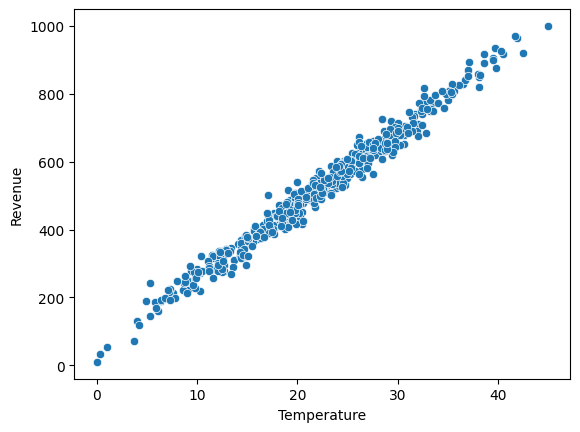

In [28]:
import seaborn as sns

sns.scatterplot(x=X_train, y=y_train);

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=1000)

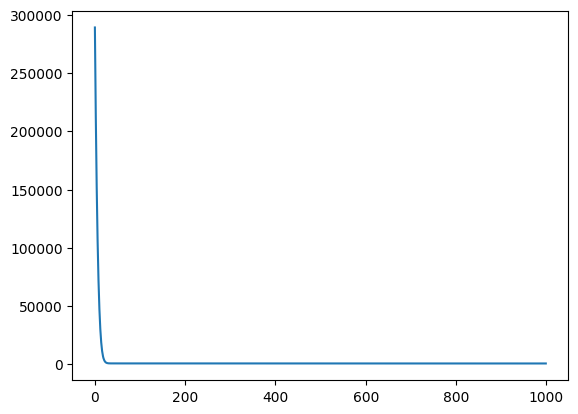

In [30]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();

In [31]:
# Previsões com o modelo treinado
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

1/1 [==============================] - 0s 160ms/step
Revenue Predictions Using Trained ANN = [[152.05663]]


16/16 [==============================] - 0s 3ms/step


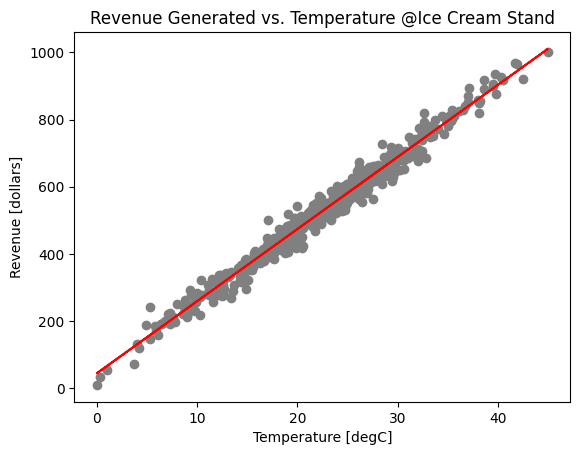

In [33]:
from matplotlib import pyplot as plt

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');


### em resumo nos fizemos o seguinte:

- Carregar e Visualizar os Dados
- Criar e Compilar o Modelo
- Treinamento
- Avaliação e Predição

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

def carregar_e_visualizar_dados():
    # Carregar os dados
    #!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/IA/lab07/SalesData.csv /content
    df = pd.read_csv('SalesData.csv')
    df.info()

    # Separar os dados
    X_train = df['Temperature']
    y_train = df['Revenue']

    # Visualizar os dados
    sns.scatterplot(x=X_train, y=y_train)
    plt.show()

    return X_train, y_train

def criar_e_compilar_modelo():
    # Criar o modelo
    model = keras.Sequential([
        layers.Dense(units=1, input_shape=[1])
    ])

    # Compilar o modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mse')
    model.summary()

    return model

def treinar_modelo(model, X_train, y_train, epochs=100):
    historico_epochs = model.fit(X_train, y_train, epochs=epochs)
    df_historico = pd.DataFrame(historico_epochs.history)
    df_historico['loss'].plot()
    plt.show()
    return model

def avaliar_e_prever(model, X_train, y_train):
    # Visualizar as predições do modelo
    plt.scatter(X_train, y_train, color='gray')
    plt.plot(X_train, model.predict(X_train), color='red')
    plt.ylabel('Receita [dólares]')
    plt.xlabel('Temperatura [°C]')
    plt.title('Receita Gerada vs. Temperatura no Ponto de Venda de Sorvetes')
    plt.show()

    # Fazer uma previsão
    temp = 5
    receita = model.predict([temp])
    print('Previsão de Receita Usando a ANN Treinada =', receita)

# Carregar e visualizar os dados
X_train, y_train = carregar_e_visualizar_dados()

# Criar e compilar o modelo
model = criar_e_compilar_modelo()

# Treinar o modelo
model = treinar_modelo(model, X_train, y_train)

# Avaliar e fazer predições
avaliar_e_prever(model, X_train, y_train)



### Desafio: Implementação end-to-end MLP

Realize o treinamento de uma rede MLP para o dataset Fashion MNIST. Um guia passo a passo pode ser encontrado no link https://www.tensorflow.org/tutorials/keras/classification.

In [ ]:
### Seu código aqui.....